In [1]:
import JSON
using CelestialCalc, TimeZones

[ Info: Precompiling CelestialCalc [b574eafa-d90c-447d-b581-2e8df5fb8454]


### Import Bright Stars Catalog

In [2]:
function brightstars_catalog()
  filename = "./data/BSC.json"
  catalog = JSON.parsefile(filename)
  [parsestar(star) for star in catalog]
end

function parsestar(star)
  α = parse_α(star["RA"])
  δ = parse_δ(star["DEC"])
  mag = parse(Float64, star["MAG"])
  return Star(EquatorialCoordinates(α,δ),mag)
end

function parse_α(input)
  (h, m, s) = map(x -> parse(Float64, x), split(input, ":"))
  (mi,s) = modf(s)
  return Time(h,m,s,round(mi*1000))
end

function parse_δ(input)
  (deg,m,s) = map(x -> parse(Float64, x), split(input, ":"))
  dec = Angle(abs(deg), m, s, deg < 0)
  return angle_to_decimal(dec)
end

;

In [3]:
brightstars = brightstars_catalog()
;

### Choose date, time and location

In [4]:
date = ZonedDateTime(2024,1,2,22,45,tz"UTC-3")
latlng = LatLng(-22.9068, -43.1729)

LatLng(-22.9068, -43.1729)

### Plot star map

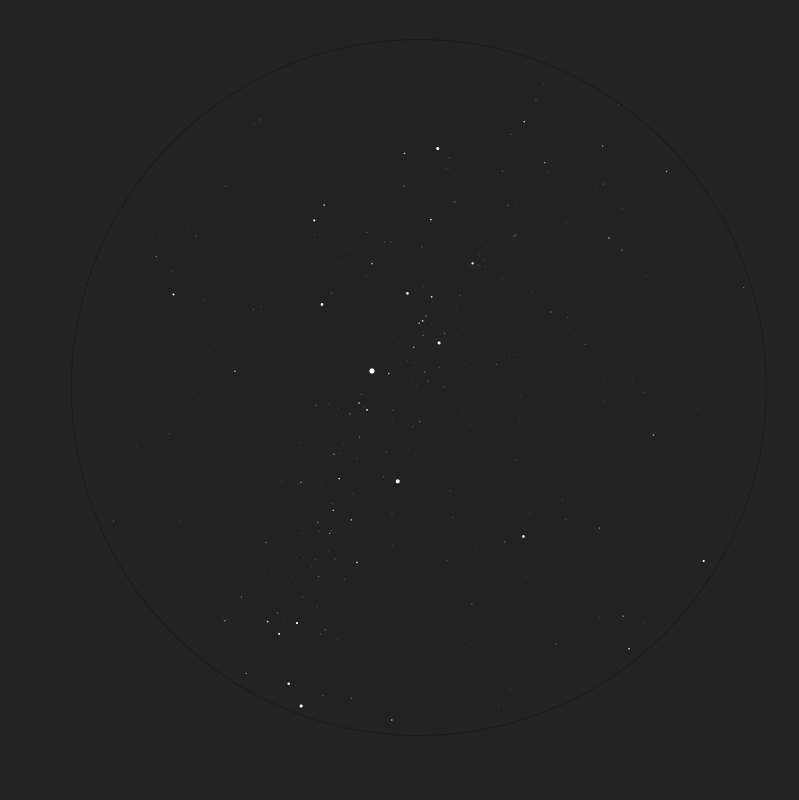

In [51]:
plot_starmap(brightstars, date, latlng; size=(800,800))